In [1]:
import cv2
import utils
from matplotlib import pyplot as plt
%matplotlib inline

# Opening an image

In [2]:
# path to images
path = 'C:/Programs Python/IOC/biofilm_formation_images'

In [3]:
num_of_image = int(input())
if 1 <= num_of_image <= 5:
    img_format = 'jpg'
elif 10 <= num_of_image <= 18:
    img_format = 'tif'
else:
    img_format = ''

10


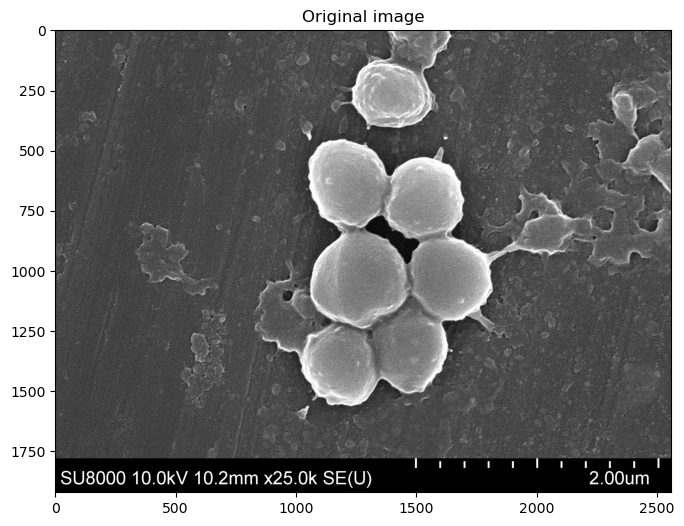

In [4]:
if img_format:
    image = cv2.imread('{}/{}.{}'.format(path, num_of_image, img_format))
    plt.figure(figsize=(10, 6))
    plt.title('Original image')
    plt.imshow(image)

# Deleting a description

In [5]:
# determine the size of description area
size = utils.get_size_for_crop(image)
size

140

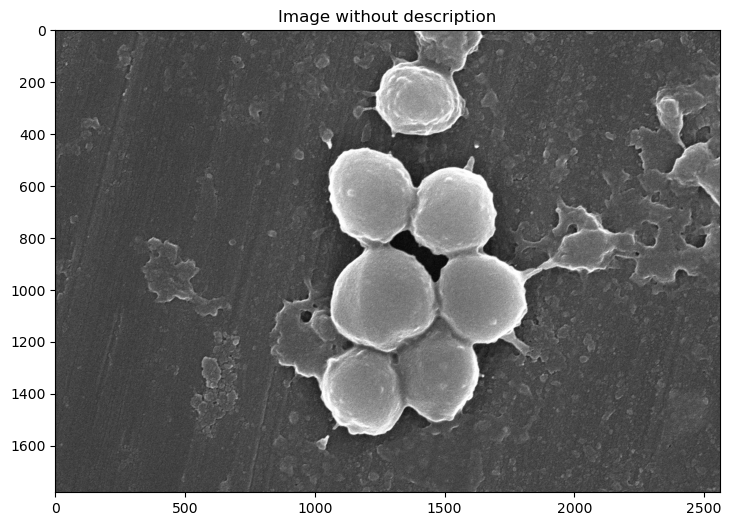

In [6]:
new_image = utils.delete_description(image, size)
plt.figure(figsize=(10, 6))
plt.title('Image without description')
plt.imshow(new_image)

# Building an intensity histogram

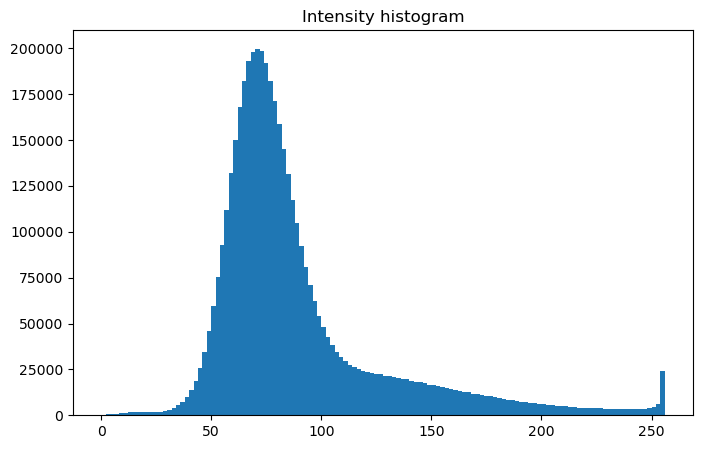

In [9]:
ax = utils.plot_intensity_dist(new_image, 128, (8, 5))

# Using filters (Average, Median, Gaussian)

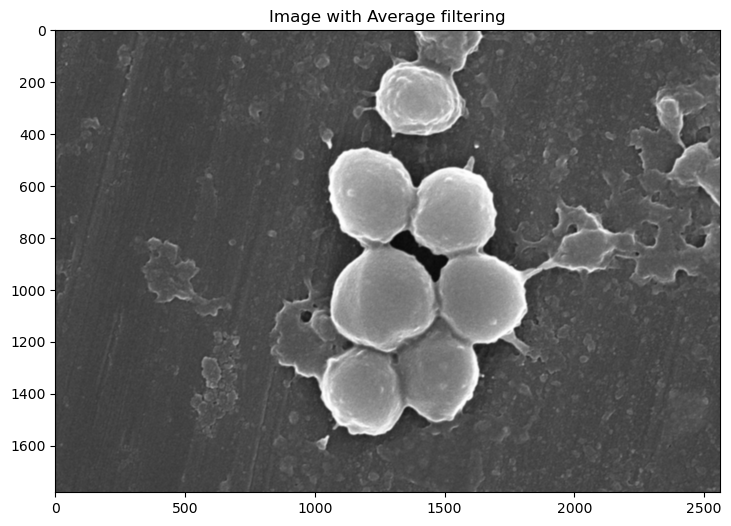

In [10]:
params = {'average_ksize': 7}
filtered_img = utils.filter_image(new_image, 'Average', **params)
plt.figure(figsize=(10, 6))
plt.title('Image with Average filtering')
plt.imshow(filtered_img)

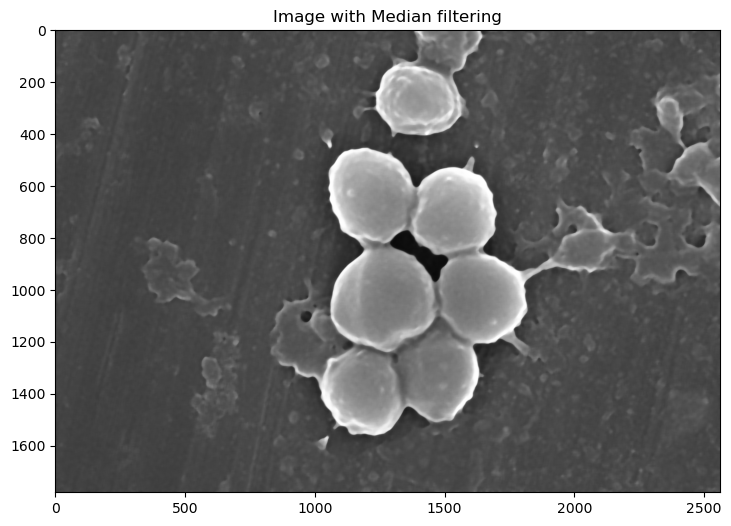

In [11]:
params = {'median_ksize': 15}
filtered_img = utils.filter_image(new_image, 'Median', **params)
plt.figure(figsize=(10, 6))
plt.title('Image with Median filtering')
plt.imshow(filtered_img)

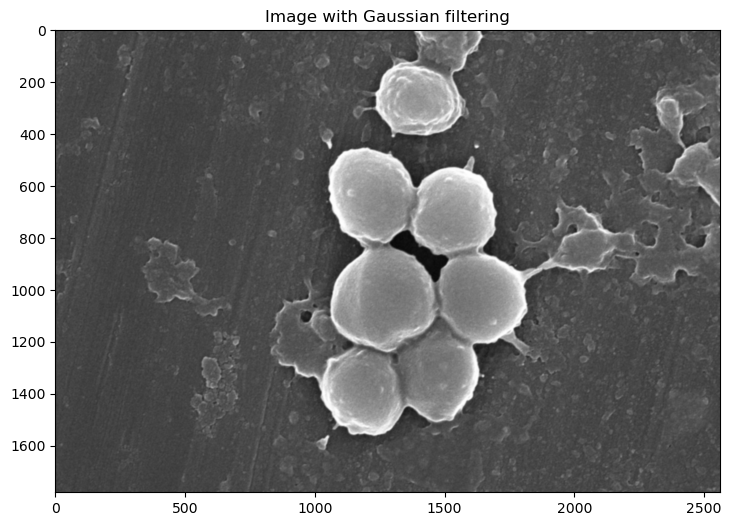

In [12]:
params = {'gauss_ksize': 9, 'x_deviation': 2, 'y_deviation': 2}
filtered_img = utils.filter_image(new_image, 'Gaussian', **params)
plt.figure(figsize=(10, 6))
plt.title('Image with Gaussian filtering')
plt.imshow(filtered_img)

# Using morphological operations

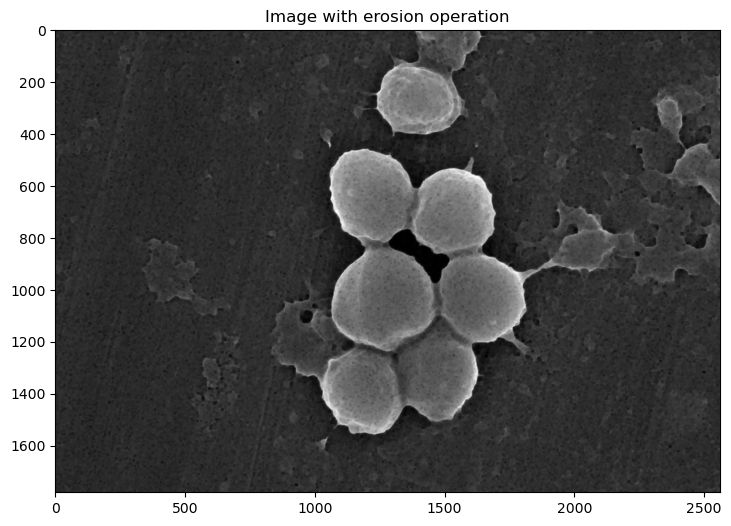

In [13]:
params = {'ksize': 5, 'iters': 2}
transf_img = utils.morph_transform(new_image, 'erosion', **params)

plt.figure(figsize=(10, 6))
plt.title('Image with erosion operation')
plt.imshow(transf_img)

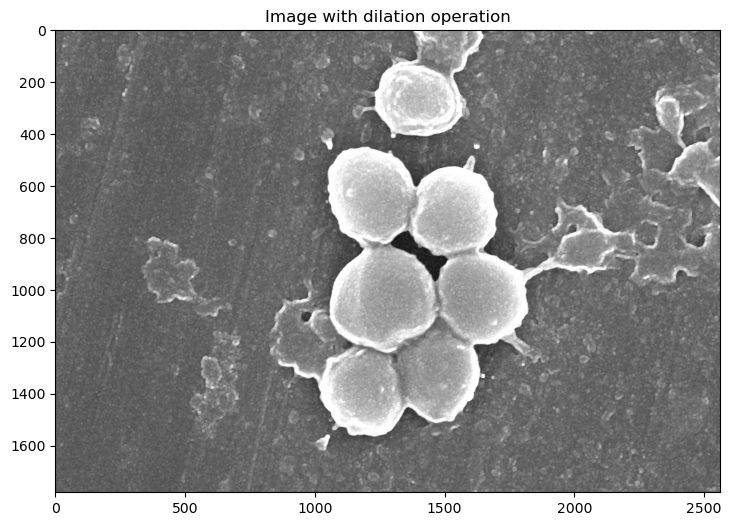

In [14]:
params = {'ksize': 7, 'iters': 1}
transf_img = utils.morph_transform(new_image, 'dilation', **params)

plt.figure(figsize=(10, 6))
plt.title('Image with dilation operation')
plt.imshow(transf_img)

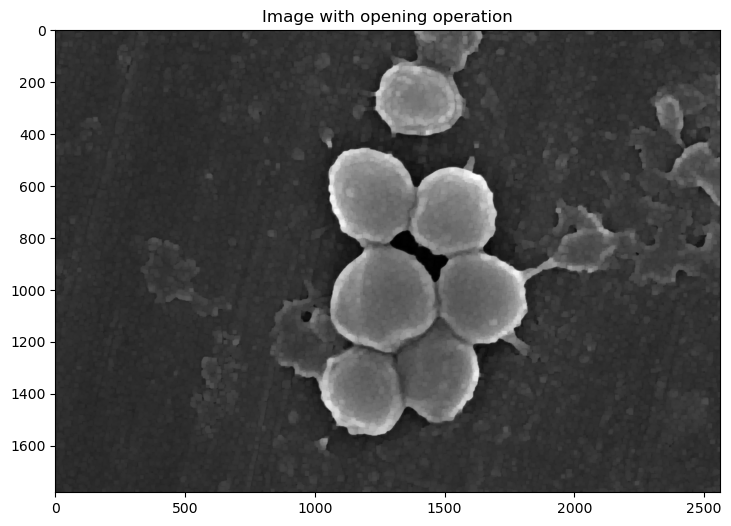

In [15]:
params = {'ksize': 7, 'iters': 2}
transf_img = utils.morph_transform(new_image, 'opening', **params)

plt.figure(figsize=(10, 6))
plt.title('Image with opening operation')
plt.imshow(transf_img)

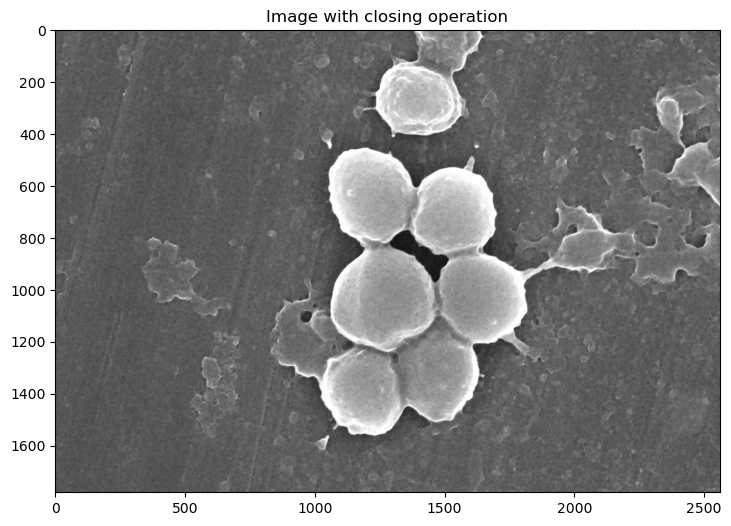

In [16]:
params = {'ksize': 7, 'iters': 1}
transf_img = utils.morph_transform(new_image, 'closing', **params)

plt.figure(figsize=(10, 6))
plt.title('Image with closing operation')
plt.imshow(transf_img)

# Detection edges

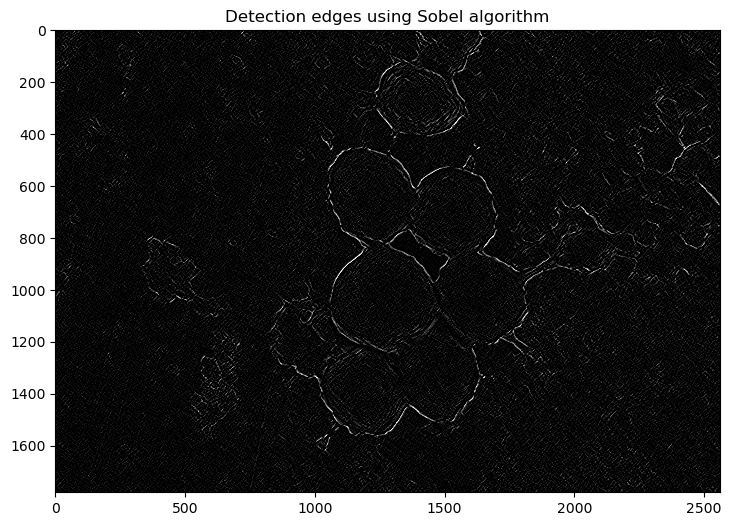

In [17]:
params={'gauss_ksize': 7, 'sobel_ksize': 5, 'dx': 1, 'dy': 1}
edged_img = utils.detect_edges(new_image, 'Sobel', **params)

plt.figure(figsize=(10, 6))
plt.title('Detection edges using Sobel algorithm')
plt.imshow(edged_img, cmap='gray', vmin=0, vmax=255)

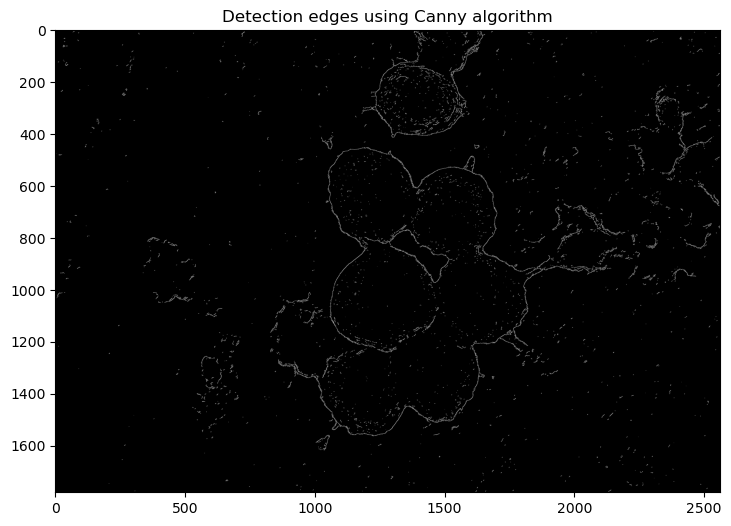

In [18]:
params = {'treshold1': 200, 'treshold2': 300}
edged_img = utils.detect_edges(new_image, 'Canny', **params)

plt.figure(figsize=(10, 6))
plt.title('Detection edges using Canny algorithm')
plt.imshow(edged_img, cmap='gray', vmin=0, vmax=255)